## Importando Bases

Relacionando SQL e Python - revisar! Qual a melhor abordagem?

In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [ ]:
# Conexão com MySQL Community Server - banco de dados específico
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [ ]:
connection = create_server_connection("localhost", "root", pw)

In [ ]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
# Função para executar consultas
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [ ]:
# Exemplo de criação de tabela

create_teacher_table = """
CREATE TABLE teacher (
  teacher_id INT PRIMARY KEY,
  first_name VARCHAR(40) NOT NULL,
  last_name VARCHAR(40) NOT NULL,
  language_1 VARCHAR(3) NOT NULL,
  language_2 VARCHAR(3),
  dob DATE,
  tax_id INT UNIQUE,
  phone_no VARCHAR(20)
  );
 """

connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database
execute_query(connection, create_teacher_table) # Execute our defined query

### Importando CSV, Excel, entre outros

In [3]:
import pandas as pd
df = pd.read_csv(r'path\file_name.csv')
print(df)

In [ ]:
Alternativos: 
pd.read_excel

ou diferente para .txt
f = open('words.txt', 'r')
content = f.read()
print(content)
f.close()

In [ ]:
# Curiosidade, importando imagens:
import matplotlib.pyplot as plt
image = plt.imread('images/my_image.jpg')
plt.imshow(image)

ou 

from PIL import Image
image = Image.open("image_path.jpg")
image.show()

### Converter tipos de dados

In [4]:
f = 57
print(float(f))

57.0


In [5]:
print(int(f))

57


In [13]:
s = str(f)
print(s)

57


In [14]:
type(s)

str

In [15]:
num_1 = '50'
num_2 = '108'
resultado = int(num_1) - int(num_2)

print(resultado)

-58


In [17]:
print(abs(resultado))

58


In [10]:
s = pd.Series(["a", "b", "c"],name="letras")
s.to_frame()

,letras
0,a
1,b
2,c


In [12]:
s.index = ['Lina_1', 'Linha_2', 'Linha_3']
s.to_frame()

,letras
Lina_1,a
Linha_2,b
Linha_3,c


In [7]:
import pandas as pd
df = pd.DataFrame({
    'A': ['Tom', 'Nick', 'John', 'Peter'],
    'B': [25, 16, 27, 18]})

df = df.rename(index=lambda x: x + 10)
df

,A,B
10,Tom,25
11,Nick,16
12,John,27
13,Peter,18


In [ ]:
columns = [
    'A'
]

for column in df:
    df[column]

In [2]:
df = df.rename(columns=lambda x: x+'_x')
df

,A_x,B_x
10,Tom,25
11,Nick,16
12,John,27
13,Peter,18


In [ ]:
df.columns.values[1] = 'Idade'
df.columns.values[0] = 'Nome'
df

In [4]:
df = df.drop('A', axis = 1)
df

,B
10,25
11,16
12,27
13,18


In [5]:
df = df.drop(10)
df

,B
11,16
12,27
13,18


In [10]:
df.iloc[1].item()

27

In [13]:
# Atenção a loc vs iloc
df.loc[[11,12]] 

,B
11,16
12,27


In [14]:
df.loc[(df['B']*100) >= 10]

,B
11,16
12,27
13,18


In [16]:
# o iloc seleciona linhas e colunas por números
df.iloc[0]  # Selecionado a primeira linha do dataset
df.iloc[-1] # Selecionando a última linha

B    18
Name: 13, dtype: int64

### Manipular bases

In [43]:
data = [14,22,39,42,5,6]
  
# Create the pandas DataFrame with column name is provided explicitly
df_ids = pd.DataFrame(data, columns=['ID'])
df_ids

,ID
0,14
1,22
2,39
3,42
4,5
5,6


In [44]:
nomes = ['Carol','Julia','Maria','Diego','Lais','Carlos']
df_alunos = pd.DataFrame(nomes, columns=['Nome'])
df_alunos

,Nome
0,Carol
1,Julia
2,Maria
3,Diego
4,Lais
5,Carlos


In [45]:
row2 = df_alunos.iloc[3] 
row2

Nome    Diego
Name: 3, dtype: object

In [46]:
import numpy as np
idades = [23, 45,np.nan,34,14,89]
df_idades = pd.DataFrame(idades, columns=['Idade'])
df_idades

,Idade
0,23.0
1,45.0
2,NaN
3,34.0
4,14.0
5,89.0


In [47]:
df_idades.isnull()

,Idade
0,False
1,False
2,True
3,False
4,False
5,False


In [48]:
df_idades = df_idades.fillna(0)
df_idades

,Idade
0,23.0
1,45.0
2,0.0
3,34.0
4,14.0
5,89.0


In [49]:
result = pd.concat([df_ids, df_alunos, df_idades], axis=1)
result

,ID,Nome,Idade
0,14,Carol,23.0
1,22,Julia,45.0
2,39,Maria,0.0
3,42,Diego,34.0
4,5,Lais,14.0
5,6,Carlos,89.0


In [50]:
df1 = pd.DataFrame(
{
"A": ["A0", "A1", "A2", "A3"],
"B": ["B0", "B1", "B2", "B3"],
 "C": ["C0", "C1", "C2", "C3"],
"D": ["D0", "D1", "D2", "D3"],
},
index=[0, 1, 2, 3],
)
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [52]:
df2 = pd.DataFrame(
{
"A": ["A4", "A5", "A6", "A7"],
"B": ["B4", "B5", "B6", "B7"],
"C": ["C4", "C5", "C6", "C7"],
"D": ["D4", "D5", "D6", "D7"],
},
index=[4, 5, 6, 7],)
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [53]:
frames = [df1, df2]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [56]:
result = pd.concat(frames, keys=['x', 'y'])
result

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7

### Resumo: concat, merge e join - pode ser confuso!

#### Concat:

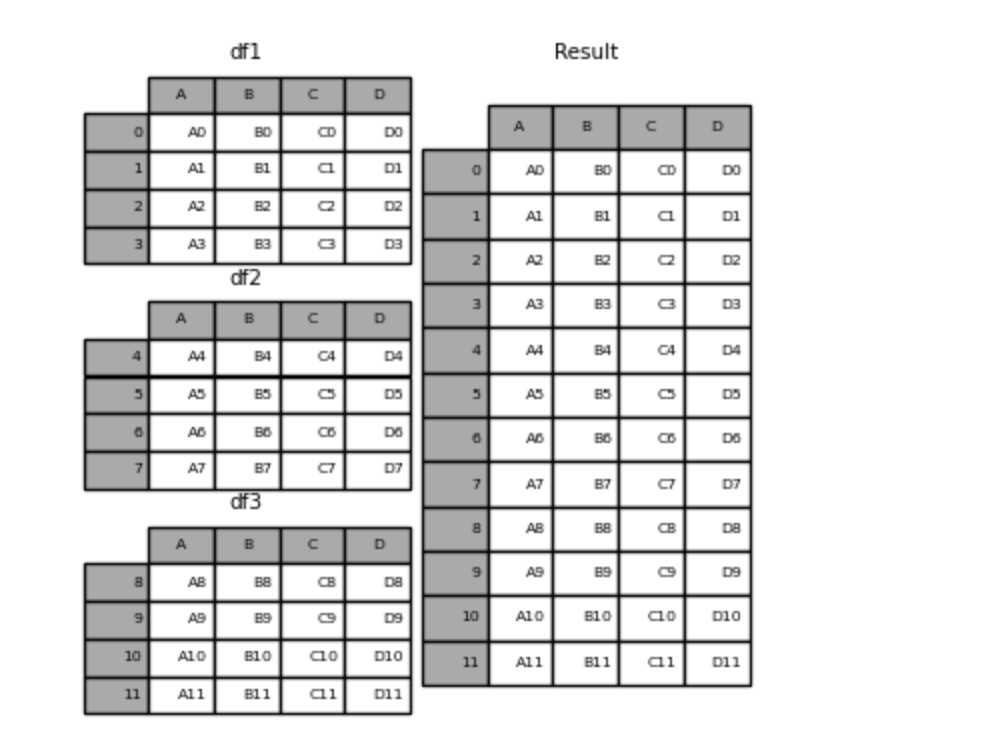

se axis = 1 
pd.concat([df1, df4], axis=1)

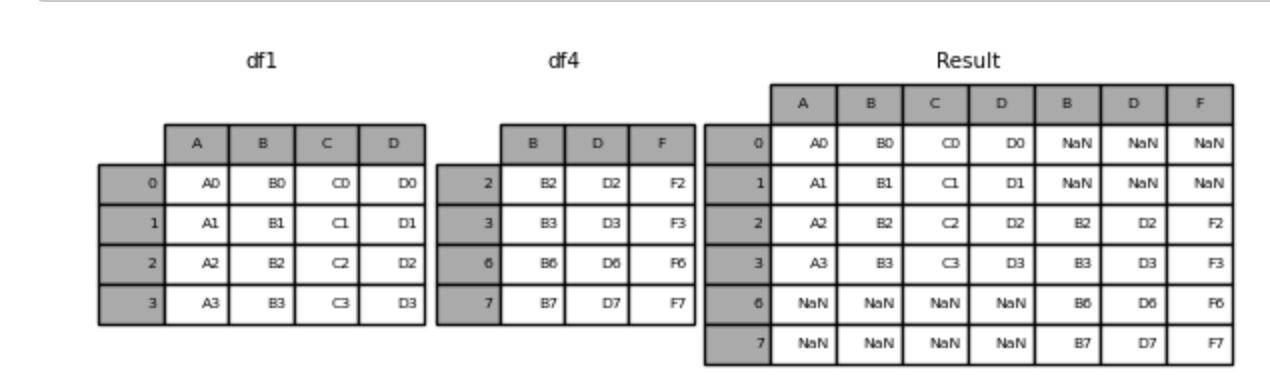

com join = 'inner'
result = pd.concat([df1, df4], axis=1, join='inner')

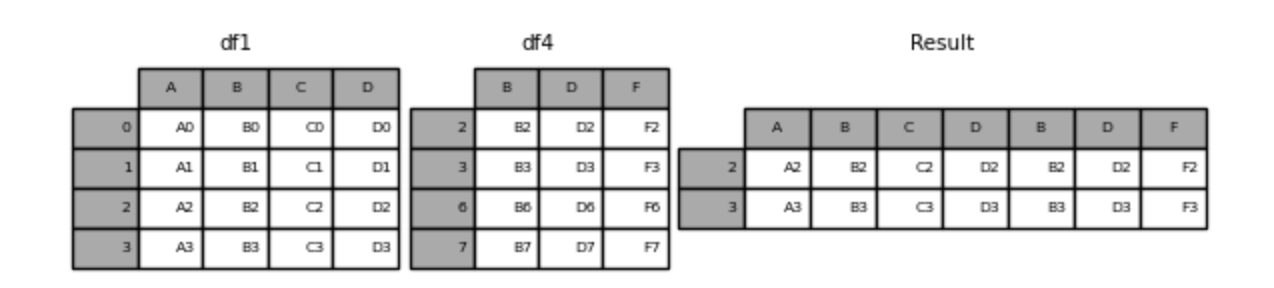

In [ ]:
# Muitas possibilidades!
pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [ ]:
# Possível adicionar uma única linha ao dataframe com concat
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
result = pd.concat([df1, s2.to_frame().T], ignore_index=True)

#### Merge: mais similar ao SQL!

In [ ]:
result = pd.merge(left, right, on="key", how = )

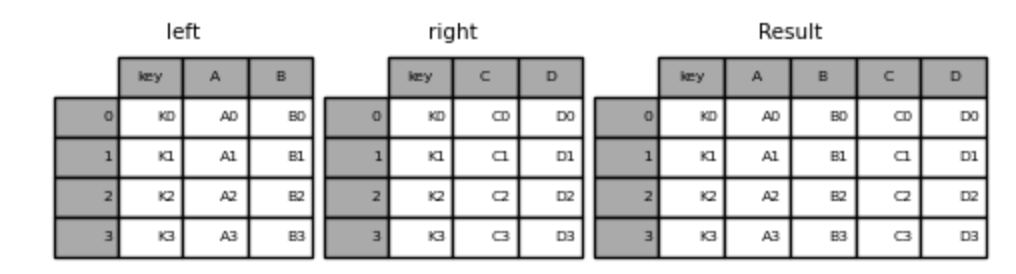

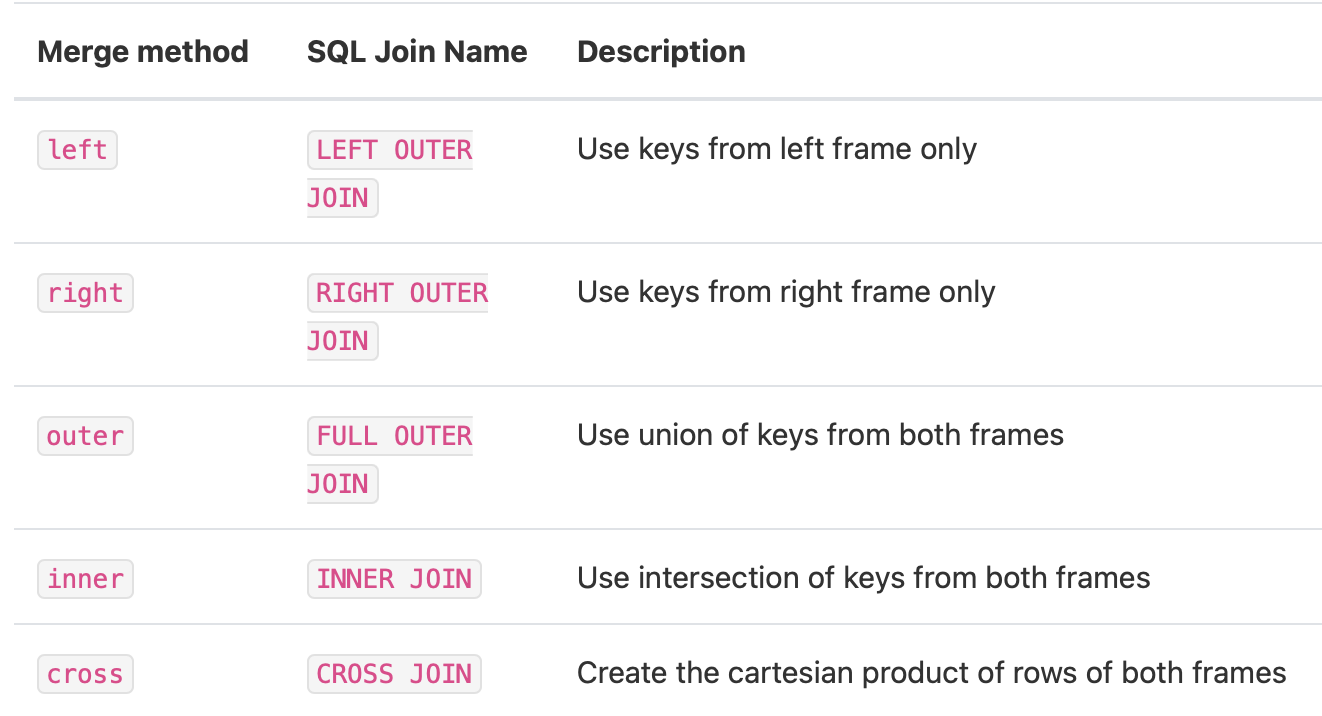

In [3]:
import pandas as pd

df1 = pd.DataFrame({"col1": [0, 1], "col_left": ["a", "b"]})
df2 = pd.DataFrame({"col1": [1, 2, 2], "col_right": [2, 2, 2]})

result = pd.merge(df1, df2, on="col1", how="outer", indicator=True)
result

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


#### Join

In [4]:
left = pd.DataFrame( {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"])
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [5]:
right = pd.DataFrame({"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"])
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [6]:
result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [7]:
result = left.join(right, how="inner")
result

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [8]:
result = left.join(right, how="outer")
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Resumo: 
* concat() para combinar DataFrames em linhas ou colunas
* merge() para combinar dados em colunas ou índices comuns
* join() para combinar dados em uma coluna chave ou um índice, merge() com (left_index=True)